In [1]:
import pandas as pd
from neuralprophet import NeuralProphet
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math

WARNING - (py.warnings._showwarnmsg) - C:\Users\strub\anaconda3\envs\prophet39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"



In [2]:
df = pd.read_csv('../series2_weekly_normalized.csv')
df.columns = ['A','ds','y']
del df['A']
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,y
0,2016-01-01,0.605058
1,2016-01-02,0.514266
2,2016-01-03,0.406297
3,2016-01-04,0.353429
4,2016-01-05,0.392692


In [3]:
#m = NeuralProphet()
m = NeuralProphet(seasonality_mode="additive")
metrics = m.fit(df, freq="D")

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.954% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 154


  0%|          | 0/134 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.71E-02, min: 9.33E-01


  0%|          | 0/134 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.60E-02, min: 1.09E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 7.98E-02
Epoch[154/154]: 100%|██████████| 154/154 [00:44<00:00,  3.50it/s, SmoothL1Loss=0.0021, MAE=0.0165, RMSE=0.0332, RegLoss=0] 


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.954% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.954% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
WARNING - (py.warnings._showwarnmsg) - C:\Users\strub\anaconda3\envs\prophet39\lib\site-packages\neuralprophet\forecaster.py:2060: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(future_df)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.955% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.955% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is 

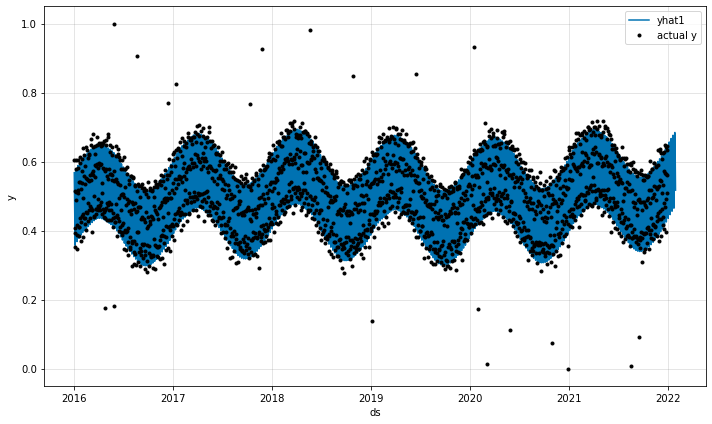

In [4]:
future = m.make_future_dataframe(df=df, periods=30)
future = m.make_future_dataframe(df, periods=30, n_historic_predictions=len(df))
forecast = m.predict(future)
fig_forecast = m.plot(forecast)

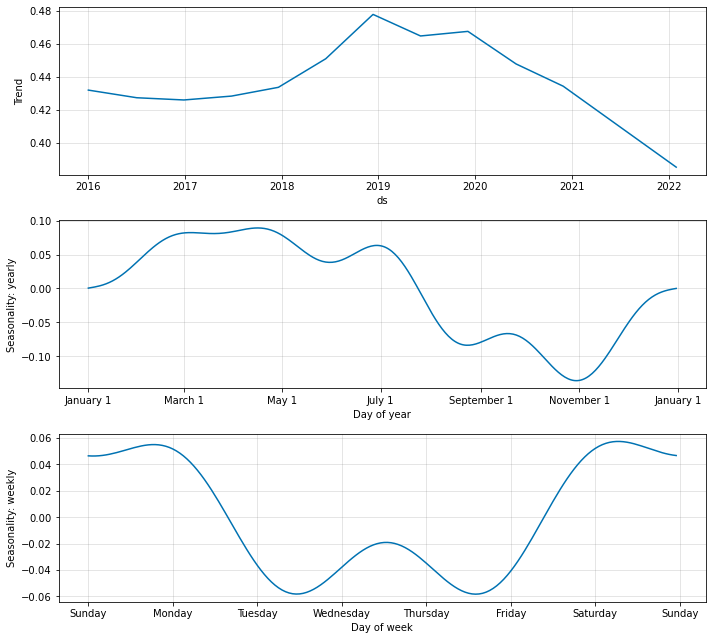

In [8]:
fig_comp = m.plot_components(forecast)

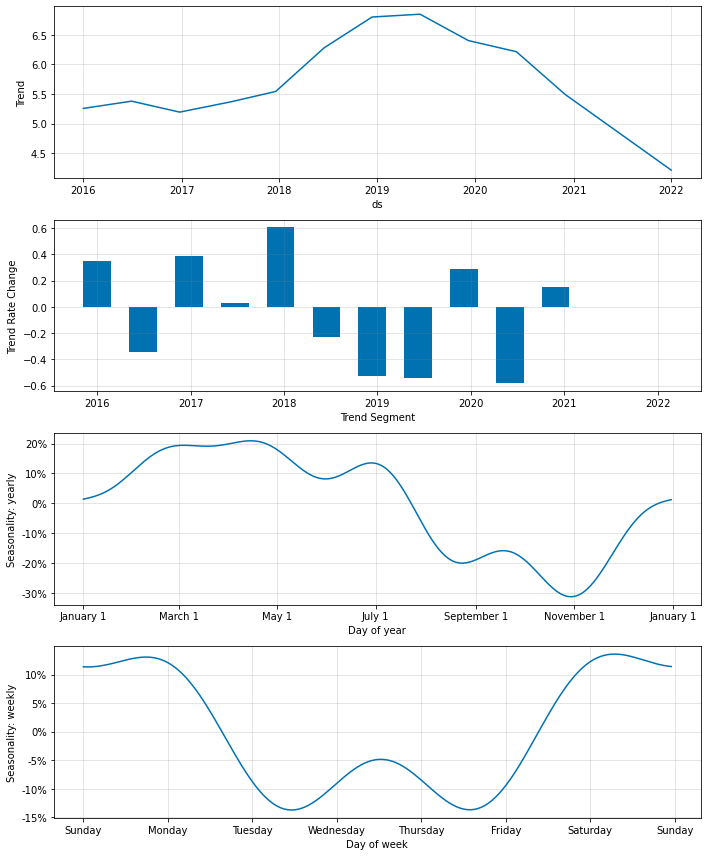

In [122]:
fig_param = m.plot_parameters()

In [5]:
forecast.head()

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
0,2016-01-01,0.605058,0.567862,-0.037196,0.463704,0.003484,0.100674
1,2016-01-02,0.514266,0.498011,-0.016255,0.463808,0.004914,0.029289
2,2016-01-03,0.406297,0.401577,-0.004720,0.463912,0.006346,-0.068681
3,2016-01-04,0.353429,0.357491,0.004063,0.464016,0.007778,-0.114303
4,2016-01-05,0.392692,0.402613,0.009921,0.464120,0.009209,-0.070716


In [16]:
df_prediction = pd.DataFrame(columns=['ds', 'trendN', 'yearlyN'])
df_prediction.ds = forecast['ds'] 
df_prediction.trendN =  (forecast['trend'] - forecast['trend'].min()) / (forecast['trend'].max() - forecast['trend'].min()) + 1
df_prediction.yearlyN = (forecast['season_yearly'] - forecast['season_yearly'].min()) / (forecast['season_yearly'].max() - forecast['season_yearly'].min()) 
df_prediction['noiseN'] = (forecast['residual1'] - forecast['residual1'].min()) / (forecast['residual1'].max() - forecast['residual1'].min()) 
df_prediction['monthlyN'] = (forecast['season_weekly'] - forecast['season_weekly'].min()) / (forecast['season_weekly'].max() - forecast['season_weekly'].min()) 
df_prediction.head()                                                                         

,ds,trendN,yearlyN,noiseN,monthlyN
0,2016-01-01,1.000000,0.528629,0.411173,0.996381
1,2016-01-02,1.001271,0.537790,0.434702,0.665526
2,2016-01-03,1.002542,0.546964,0.447663,0.211451
3,2016-01-04,1.003814,0.556142,0.457530,0.000000
4,2016-01-05,1.005085,0.565311,0.464113,0.202016


In [17]:
# Load True Values
df_true = pd.read_csv('../series2_weekly_complete.csv')
df_true.head()

,date,trueYaddN,trueYmultN,trueYearly,trueYearlyN,trueMonthly,trueMonthlyN,trueTrend,trueTrendN,trueNoise
0,2016-01-01,0.605058,0.529672,1.000000,0.500000,2.363946,1.000000,1.5,1.000000,1.386899
1,2016-01-02,0.514266,0.444995,1.017213,0.508607,1.362371,0.650246,2.0,1.000891,1.187663
2,2016-01-03,0.406297,0.344108,1.034422,0.517211,0.087924,0.205205,2.5,1.001783,1.037538
3,2016-01-04,0.353429,0.294675,1.051620,0.525810,-0.499712,0.000000,3.0,1.002674,0.918400
4,2016-01-05,0.392692,0.331538,1.068802,0.534402,0.041966,0.189156,3.5,1.003566,0.870111


# MAE FOR Yearly SEASONALITY

In [18]:
# Standardize Yearly Pred 

mean = sum(df_prediction['yearlyN']) / len(df_prediction)
standard_deviation = math.sqrt( sum((df_prediction['yearlyN'] - mean)**2 ) / len(df_prediction))
df_prediction['yearlyS']= (df_prediction['yearlyN'] - mean) / standard_deviation

df_prediction.tail()

,ds,trendN,yearlyN,noiseN,monthlyN,yearlyS
2217,2022-01-26,1.995059,0.739902,NaN,0.633049,0.672155
2218,2022-01-27,1.996295,0.746313,NaN,1.000000,0.690765
2219,2022-01-28,1.997530,0.752553,NaN,0.996381,0.708880
2220,2022-01-29,1.998765,0.758627,NaN,0.665526,0.726511
2221,2022-01-30,2.000000,0.764540,NaN,0.211451,0.743673


In [19]:
# Standardize Yearly True

mean = sum(df_true['trueYearlyN']) / len(df_true)
standard_deviation = math.sqrt( sum((df_true['trueYearlyN'] - mean)**2 ) / len(df_true))
df_true['trueYearlyS']= (df_true['trueYearlyN'] - mean) / standard_deviation

df_true.tail()

,date,trueYaddN,trueYmultN,trueYearly,trueYearlyN,trueMonthly,trueMonthlyN,trueTrend,trueTrendN,trueNoise,trueYearlyS
2187,2021-12-27,0.396557,0.366862,0.948380,0.474190,-0.499712,5.750717e-10,559.2,1.994295,0.591832,-0.073046
2188,2021-12-28,0.509969,0.512784,0.965578,0.482789,0.041966,1.891559e-01,560.0,1.995721,1.508898,-0.048713
2189,2021-12-29,0.561928,0.653000,0.982787,0.491393,1.305063,6.302341e-01,560.8,1.997147,0.904003,-0.024366
2190,2021-12-30,0.645526,0.806587,1.000000,0.500000,2.338442,9.910937e-01,561.6,1.998574,0.940978,-0.000011
2191,2021-12-31,0.635107,0.800258,1.017213,0.508607,2.363946,1.000000e+00,562.4,2.000000,0.761115,0.024343


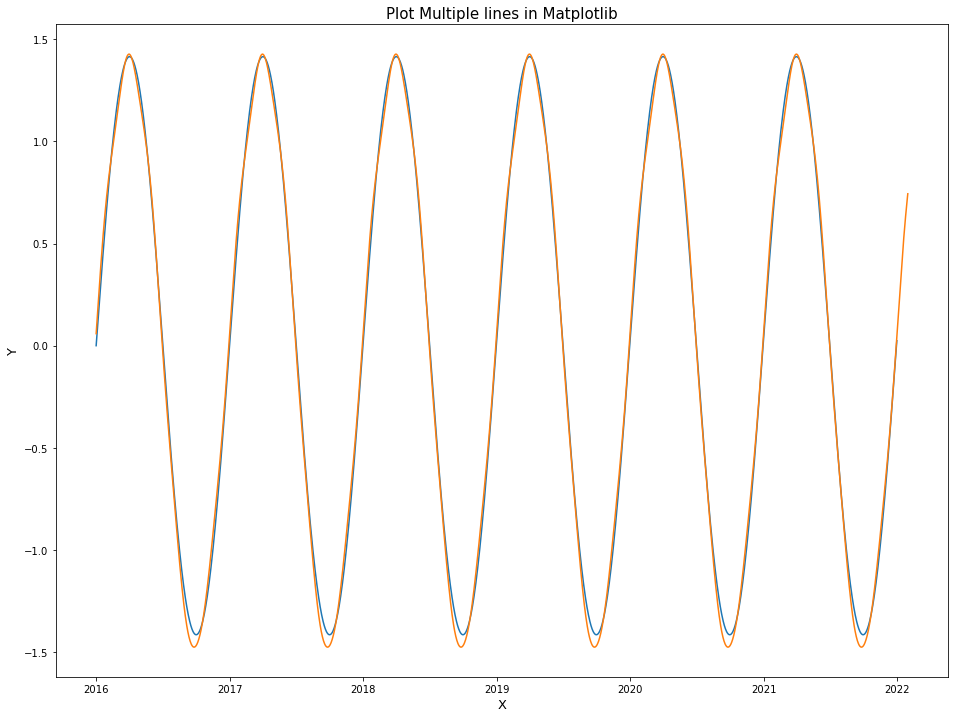

In [20]:
#Figure to compare actual and predictat yearly seasonality  

import matplotlib.pyplot as plt 

y1 = df_true['trueYearlyS']
y2 = df_prediction['yearlyS']
x1 = pd.to_datetime(df_true['date'])
x2 = pd.to_datetime(df_prediction['ds'])


plt.plot(x1, y1)
plt.plot(x2, y2)

plt.title("Plot Multiple lines in Matplotlib",fontsize=15)
plt.xlabel("X",fontsize=13)
plt.ylabel("Y",fontsize=13)
#plt.legend()
plt.rcParams["figure.figsize"] = (16,12)
plt.show()

### MAE

In [21]:
y_true = df_true['trueYearlyS']
y_pred = df_prediction['yearlyS'][0:2192]
print("Mean Absolute Error:\n")
print(mean_absolute_error(y_true, y_pred))

Mean Absolute Error:

0.037369412329350316


### RMSE

In [130]:
mse=mean_squared_error(y_true, y_pred)
rmse = math.sqrt(mse)
print("Root Mean Square Error:\n")
print(rmse)

Root Mean Square Error:

0.5592059529754213


# MAE FOR Monthly SEASONALITY

In [14]:
# Standardize monthly Pred 

mean = sum(df_prediction['monthlyN']) / len(df_prediction)
standard_deviation = math.sqrt( sum((df_prediction['monthlyN'] - mean)**2 ) / len(df_prediction))
df_prediction['monthlyS']= (df_prediction['monthlyN'] - mean) / standard_deviation

df_prediction.tail()

,ds,trendN,yearlyN,noiseN,monthlyN,yearlyS,monthlyS
2217,2022-01-26,1.004967,0.725975,NaN,0.031387,0.383523,-0.873872
2218,2022-01-27,1.003725,0.735115,NaN,0.063968,0.412408,-0.804154
2219,2022-01-28,1.002484,0.744475,NaN,0.000000,0.441990,-0.941032
2220,2022-01-29,1.001242,0.754024,NaN,1.000000,0.472166,1.198743
2221,2022-01-30,1.000000,0.763726,NaN,0.939445,0.502826,1.069170


In [15]:
# Standardize Monthly True

mean = sum(df_true['trueMonthlyN']) / len(df_true)
standard_deviation = math.sqrt( sum((df_true['trueMonthlyN'] - mean)**2 ) / len(df_true))
df_true['trueMonthlyS']= (df_true['trueMonthlyN'] - mean) / standard_deviation

df_true.tail()

,date,trueYaddN,trueYmultN,trueYearly,trueYearlyN,trueMonthly,trueMonthlyN,trueTrend,trueTrendN,trueNoise,trueYearlyS,trueMonthlyS
2187,2021-12-27,0.458799,4.782127,0.948380,0.554382,1.5,1.0,-31677.25,1.006832,1.310189,-0.053422,1.154086
2188,2021-12-28,0.306463,3.035988,0.965578,0.556886,0.5,0.0,-31793.80,1.005126,0.557771,-0.035626,-0.866486
2189,2021-12-29,0.354178,3.577583,0.982787,0.559392,0.5,0.0,-31910.45,1.003419,1.086309,-0.017820,-0.866486
2190,2021-12-30,0.342260,3.439193,1.000000,0.561898,0.5,0.0,-32027.20,1.001710,0.934917,-0.000008,-0.866486
2191,2021-12-31,0.360407,3.643537,1.017213,0.564405,0.5,0.0,-32144.05,1.000000,1.126324,0.017803,-0.866486


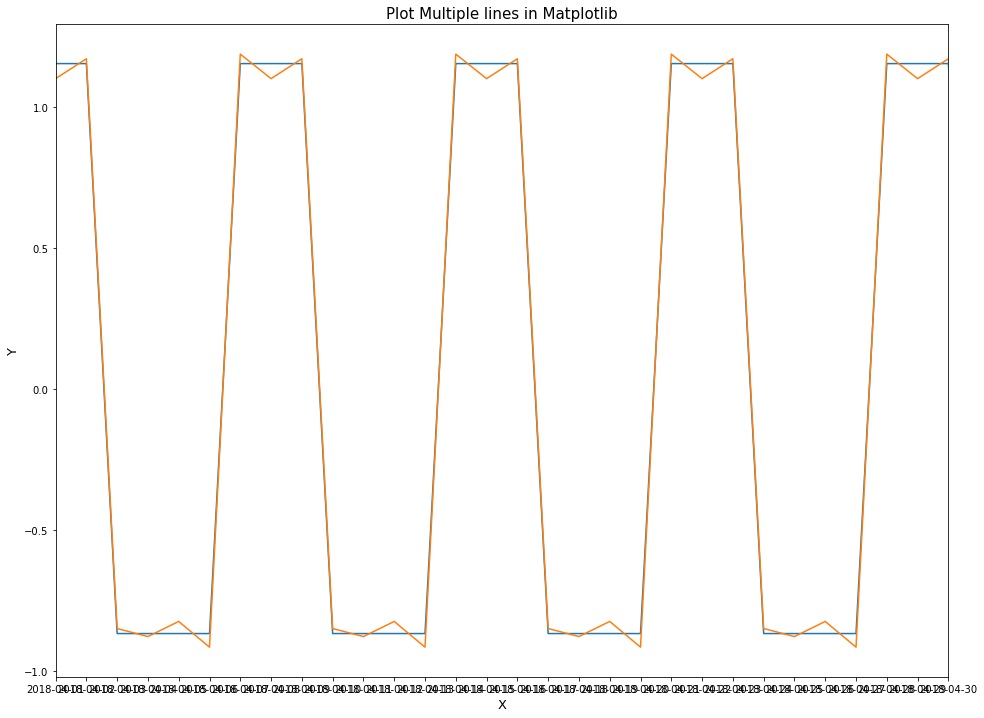

In [133]:
#Figure to compare actual and predictat monthly seasonality  

import matplotlib.pyplot as plt 

y1 = df_true['trueMonthlyS']
y2 = df_prediction['monthlyS'][0:2192]
x1 = df_true['date']
x2 = pd.to_datetime(df_prediction['ds'])


plt.plot(x1, y1)
plt.plot(x1, y2)

plt.title("Plot Multiple lines in Matplotlib",fontsize=15)
plt.xlabel("X",fontsize=13)
plt.ylabel("Y",fontsize=13)
#plt.legend()
plt.rcParams["figure.figsize"] = (16,12)
plt.xlim('2018-04-01','2018-04-30')
plt.show()

### MAE Monthly

In [135]:
y_true = df_true['trueMonthlyS']
y_pred = df_prediction['monthlyS'][0:2192]
print("Mean Absolute Error:\n")
print(mean_absolute_error(y_true, y_pred))

Mean Absolute Error:

0.03287966271660749


### RMSE Monthly

In [136]:
mse=mean_squared_error(y_true, y_pred)
rmse = math.sqrt(mse)
print("Root Mean Square Error:\n")
print(rmse)

Root Mean Square Error:

0.056728443991033745


# MAE FOR TREND 

In [22]:
# Standardize Trend Pred 

mean = sum(df_prediction['trendN']) / len(df_prediction)
standard_deviation = math.sqrt( sum((df_prediction['trendN'] - mean)**2 ) / len(df_prediction))
df_prediction['trendS']= (df_prediction['trendN'] - mean) / standard_deviation

df_prediction.tail()

,ds,trendN,yearlyN,noiseN,monthlyN,yearlyS,trendS
2217,2022-01-26,1.995059,0.739902,NaN,0.633049,0.672155,2.670389
2218,2022-01-27,1.996295,0.746313,NaN,1.000000,0.690765,2.676843
2219,2022-01-28,1.997530,0.752553,NaN,0.996381,0.708880,2.683288
2220,2022-01-29,1.998765,0.758627,NaN,0.665526,0.726511,2.689738
2221,2022-01-30,2.000000,0.764540,NaN,0.211451,0.743673,2.696183


In [23]:
# Standardize Trend True 

mean = sum(df_true['trueTrendN']) / len(df_true)
standard_deviation = math.sqrt( sum((df_true['trueTrendN'] - mean)**2 ) / len(df_true))
df_true['trueTrendS']= (df_true['trueTrendN'] - mean) / standard_deviation

df_true.tail()

,date,trueYaddN,trueYmultN,trueYearly,trueYearlyN,trueMonthly,trueMonthlyN,trueTrend,trueTrendN,trueNoise,trueYearlyS,trueTrendS
2187,2021-12-27,0.396557,0.366862,0.948380,0.474190,-0.499712,5.750717e-10,559.2,1.994295,0.591832,-0.073046,2.883156
2188,2021-12-28,0.509969,0.512784,0.965578,0.482789,0.041966,1.891559e-01,560.0,1.995721,1.508898,-0.048713,2.890287
2189,2021-12-29,0.561928,0.653000,0.982787,0.491393,1.305063,6.302341e-01,560.8,1.997147,0.904003,-0.024366,2.897417
2190,2021-12-30,0.645526,0.806587,1.000000,0.500000,2.338442,9.910937e-01,561.6,1.998574,0.940978,-0.000011,2.904548
2191,2021-12-31,0.635107,0.800258,1.017213,0.508607,2.363946,1.000000e+00,562.4,2.000000,0.761115,0.024343,2.911678


In [25]:
df_prediction.to_csv('NPSeries2.csv',index=False)

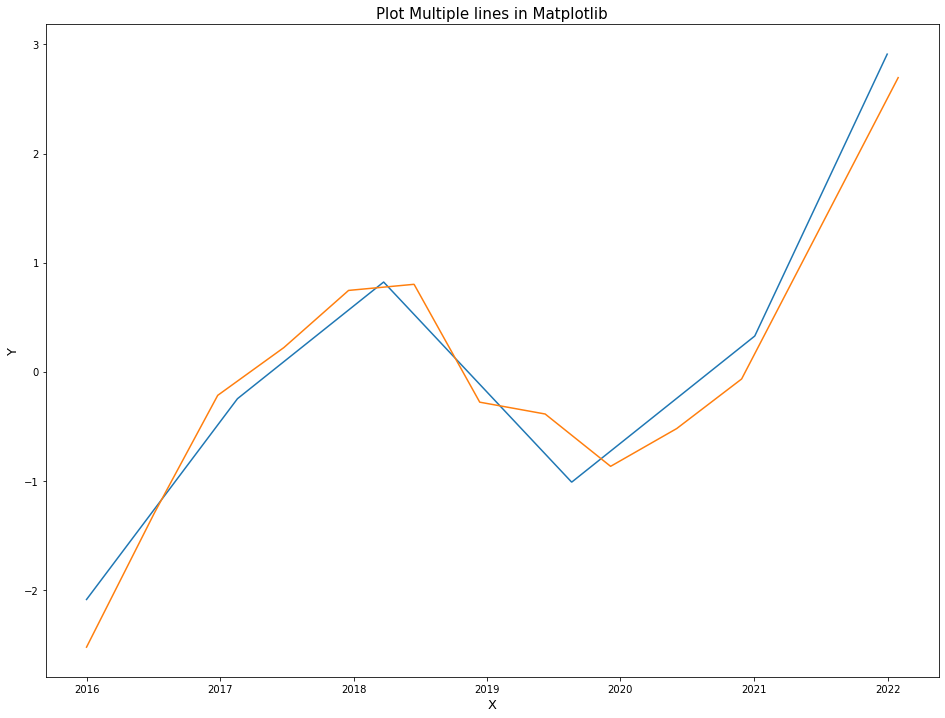

In [15]:
import matplotlib.pyplot as plt 

y1 = df_true['trueTrendS']
y2 = df_prediction['trendS']
x1 = pd.to_datetime(df_true['date'])
x2 = pd.to_datetime(df_prediction['ds'])


plt.plot(x1, y1)
plt.plot(x2, y2)

plt.title("Plot Multiple lines in Matplotlib",fontsize=15)
plt.xlabel("X",fontsize=13)
plt.ylabel("Y",fontsize=13)
#plt.legend()
plt.rcParams["figure.figsize"] = (16,12)
plt.show()

### MAE Trend

In [24]:
y_true = df_true['trueTrendS']
y_pred = df_prediction['trendS'][0:2192]
print("Mean Absolute Error:\n")
print(mean_absolute_error(y_true, y_pred))

Mean Absolute Error:

0.19936213499578304


### RMSE Trend

In [141]:
mse=mean_squared_error(y_true, y_pred)
rmse = math.sqrt(mse)
print("Root Mean Square Error:\n")
print(rmse)

Root Mean Square Error:

0.09989353739595694
